# Setup and Load Data

1.1 Install Dependencies

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

1.2 Load Data

In [2]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dataset2'
os.listdir(data_dir)

['fresh', 'good', 'notfeasible']

In [3]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dataset2')

Found 540 files belonging to 3 classes.


In [4]:
data_iterator = data.as_numpy_iterator()

In [5]:
# Get another batch from the iterator
batch = data_iterator.next()

In [6]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [7]:
# 0 = fresh || 1 = good || 2 = notfeasible

batch[1]

array([2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 1, 2, 0, 2, 2,
       2, 1, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int32)

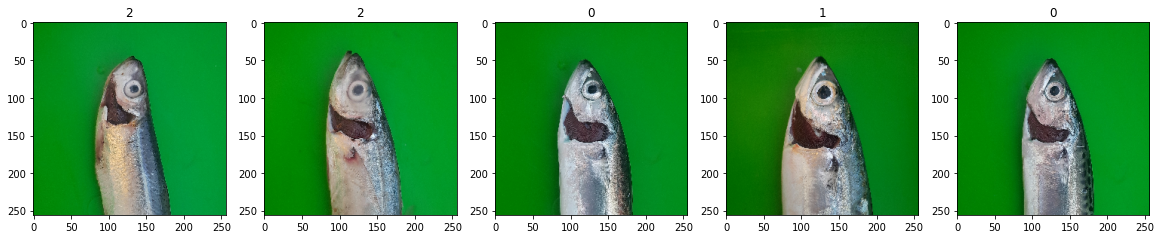

In [8]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Pre-process Data

2.1 Scale Data

In [9]:
data = data.map(lambda x, y: (x/255, y))

2.2 Split Data

In [ ]:
len(data)

In [10]:
train_size = int(len(data)*.6)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [ ]:
test_size

In [ ]:
train_size+val_size+test_size

In [11]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Model

3.1 Build Deep Learning Model

In [12]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

3.2 Train

In [15]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, validation_data=val, epochs=30, callbacks=[tensorboard_callback])

Epoch 1/30
11/11 [==============================] - 50s 4s/step - loss: 1.1853 - accuracy: 0.3693 - val_loss: 1.0714 - val_accuracy: 0.5417
Epoch 2/30
11/11 [==============================] - 17s 1s/step - loss: 1.0588 - accuracy: 0.5114 - val_loss: 0.9974 - val_accuracy: 0.3854
Epoch 3/30
11/11 [==============================] - 14s 1s/step - loss: 0.9009 - accuracy: 0.6193 - val_loss: 0.7318 - val_accuracy: 0.7812
Epoch 4/30
11/11 [==============================] - 17s 1s/step - loss: 0.7291 - accuracy: 0.6989 - val_loss: 0.7166 - val_accuracy: 0.6250
Epoch 5/30
11/11 [==============================] - 17s 1s/step - loss: 0.5431 - accuracy: 0.7869 - val_loss: 0.4983 - val_accuracy: 0.7500
Epoch 6/30
11/11 [==============================] - 17s 1s/step - loss: 0.4242 - accuracy: 0.8438 - val_loss: 0.3402 - val_accuracy: 0.8542
Epoch 7/30
11/11 [==============================] - 15s 1s/step - loss: 0.3284 - accuracy: 0.8807 - val_loss: 0.2480 - val_accuracy: 0.9375
Epoch 8/30
11/11 [==

3.2 Plot Performance

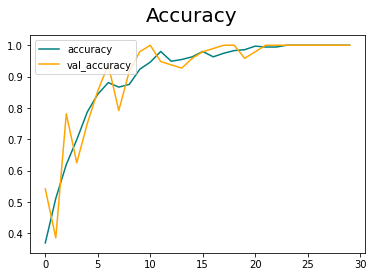

In [16]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

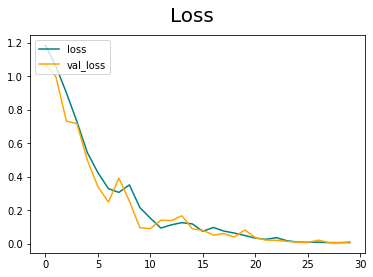

In [17]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate Performance

4.1 Evaluating on the Test Partition

In [18]:
model.evaluate(test)

3/3 [==============================] - 8s 118ms/step - loss: 0.0058 - accuracy: 1.0000


[0.005790689028799534, 1.0]



---



---



4.2 Testing on New Data



*   Percobaan 1 (Banjar Segar)



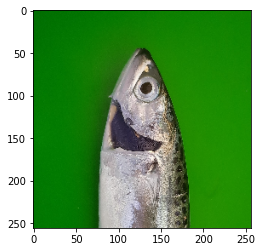

1/1 [==============================] - 0s 178ms/step


array([[0.8908397 , 0.10916029, 0.        ]], dtype=float32)

In [19]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/test_newdata/banjar_segar.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

# Untuk menampilkan hasil dalam bentuk desimal
np.set_printoptions(suppress=True) 

yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

# Convert to TensorFlow Lite

5.1 Save model

In [20]:
from tensorflow.keras.models import load_model

In [22]:
model.save(os.path.join('models', 'modelfix3.h5'))

5.2 Convert to tflite

In [23]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

5.3 Save .tflite model

In [25]:
with open("modelfix3.tflite", "wb") as f:
  f.write(tflite_model)

In [26]:
tflite_model_path = "modelfix3.tflite"



---



---

